In [1]:
import math as m
import numpy as np
from numpy.linalg import inv
import seaborn as sns
from copy import deepcopy
from typing import List, Tuple, Dict
import matplotlib.pyplot as plt

# Задание 1.

Смоделируем измерения Yk c ошибками, имеющими норамльное распределение N(0, D)

In [2]:
# Начальные условия
n = 40 # число измерений
h = 4 # шаг по времени
V = 0.25 # скорость км/ч
sko = 1 # среднеквадратическое отклорнение
Radius = 90
omega = V/Radius
mo = 0 # матожиадние
alpha = 0.05 # уровень значимости Ш(задан в варианте)
probability = 1 - alpha 
ur_znach = 1.96 

Создадим список с тактами, в которые происходят измерения:

In [3]:
t = np.array([(h * i) for i in range(n)]) #такты, в которые происходят измерения
print(t)

[  0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68
  72  76  80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140
 144 148 152 156]


Зададим начальные координаты

In [4]:
# центр окружности
x0 = 40
y0 = 50

In [5]:
x = np.array([x0 + Radius * np.cos(omega * i) for i in t ])
y = np.array([y0 - Radius * np.sin(omega * i) for i in t ])

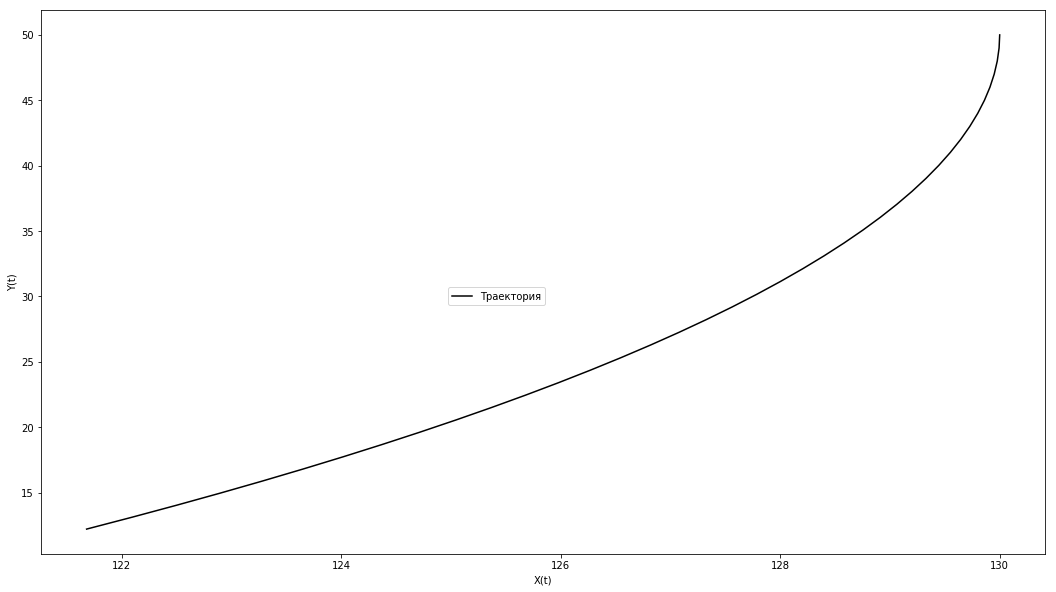

In [6]:
plt.figure(figsize=(18, 10))
plt.plot(x, y, label = 'Траектория', color = 'black')
plt.ylabel('Y(t)')
plt.xlabel('X(t)')
plt.legend(bbox_to_anchor=(0.4, 0.5), loc='upper left', borderaxespad=0.5)
plt.show()

Сформируем набор истинных измерений (без учета ошибок), как быдто мы знаем точную дальность r ЛА в каждый такт

In [7]:
dalnost = (x**2 + y**2)**0.5
print(dalnost)

[139.28388277 138.92284772 138.55770912 138.1884797  137.81517236
 137.43780014 137.05637625 136.67091405 136.28142706 135.88792897
 135.49043363 135.08895504 134.68350736 134.27410493 133.86076224
 133.44349393 133.02231483 132.59723992 132.16828433 131.73546338
 131.29879254 130.85828746 130.41396393 129.96583793 129.5139256
 129.05824326 128.59880739 128.13563463 127.66874181 127.19814592
 126.72386414 126.2459138  125.76431242 125.27907771 124.79022752
 124.29777991 123.80175312 123.30216555 122.79903581 122.29238267]


### Пункт 1. Ошибки с нормальным распределением

Добавим на измерения ошибки, распределенные нормально

С помощью встроенной функции на питон, выдающей случаные величины по заданному распределению, получим вектор ошибок, распределенных нормало

In [17]:
W_k = np.array(np.random.laplace(0, sko, n))
print(W_k)

[ 0.12142209 -1.68099422  1.73337066  2.45170991  0.52445388 -1.0977816
 -2.27720741 -0.40488383 -0.16944195  0.07272933  0.44139694 -0.29020706
 -1.15396128 -0.1959342  -0.9928975   0.17222052  0.28037271 -0.64556568
  1.22380185  0.08930202 -0.31846302 -1.95868059  1.53047634 -0.52393711
 -5.59366425  0.6873624   0.53315287 -0.02883981 -0.17201364  0.08272631
 -0.14344065  0.37925105  0.09916087 -1.78718748  0.45285051  0.80793502
  1.28970746 -0.80920768  0.20171603  0.32500317]


Сформируем окончательный набор с ошибками, распределенными нормально:

In [18]:
IZM_R = dalnost + W_k
print(IZM_R)

[139.40530486 137.2418535  140.29107978 140.64018961 138.33962625
 136.34001854 134.77916884 136.26603022 136.11198511 135.9606583
 135.93183057 134.79874798 133.52954608 134.07817073 132.86786474
 133.61571445 133.30268754 131.95167424 133.39208618 131.8247654
 130.98032953 128.89960687 131.94444026 129.44190082 123.92026135
 129.74560567 129.13196026 128.10679482 127.49672817 127.28087223
 126.58042349 126.62516485 125.86347329 123.49189023 125.24307803
 125.10571493 125.09146059 122.49295787 123.00075184 122.61738584]


Изобразим на рисунке истинную дальность и измерения:

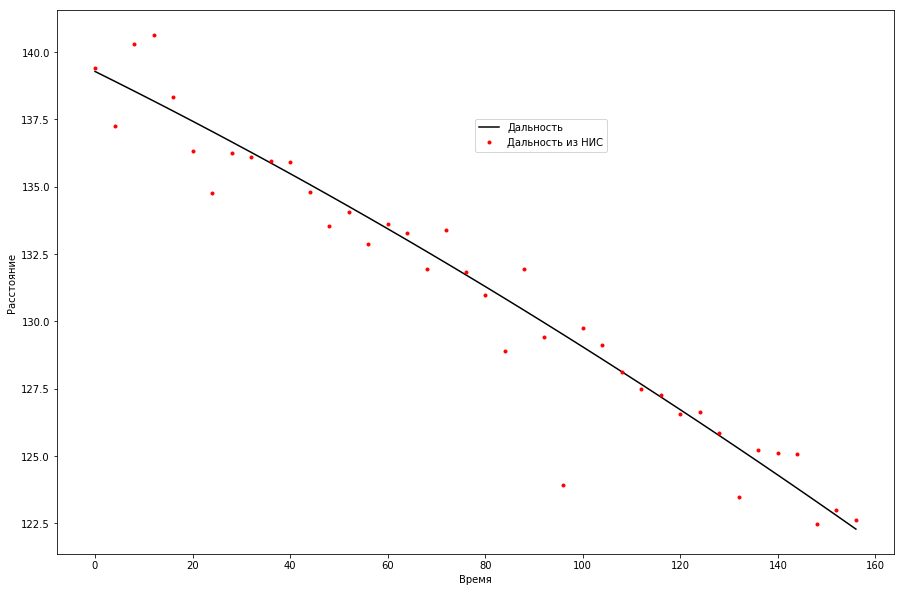

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(t, dalnost, label = 'Дальность', color = 'black')
plt.plot(t, IZM_R, '.', label = 'Дальность из НИС', color = 'r')
plt.ylabel('Расстояние')
plt.xlabel('Время')
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)

plt.show()

# Задание 2.

Решение аналитически, матричным способом

In [20]:
Vector1 = np.array([sum(IZM_R), sum(t * IZM_R)])
Matrix1 = np.array([[n, sum(np.array(t))], [sum(np.array(t)), sum(np.array(t)**2)]])
Tetta1, Tetta2 = np.linalg.solve(Matrix1, Vector1)
print('Значения коэффициентов тета', Tetta1, Tetta2)
dalnost_approx = Tetta1 + Tetta2 * t

Значения коэффициентов тета 139.5570659346443 -0.10851052356665705


Построение доверительного интервала

Посчитаем границы промежутка (-u_a; u_a):

In [21]:
Aa = np.matrix([np.ones(n),t]).transpose() #. матрица А как у влада и ани в отчете про мнк
I = np.eye(n) # единичная матрица
sigma = np.var(W_k)

# тут считает вектор дисперсии для доверительного интервала
def dispersion_count(t_arr):
    Disp = []
    for i in t:
        h_t = np.matrix([1, i]).transpose()
        a = h_t.transpose().dot(inv(Aa.transpose().dot(Aa))).dot(Aa.transpose())
        d_temp = a.dot(sigma).dot(I).dot(a.transpose())
        Disp.append(d_temp.item(0))
    Disp = np.array(Disp)
    return Disp

Disp = dispersion_count(t)

Дисперсия МНК-оценки, выборочная дисперсия

Доверительный интервал:

In [22]:
dover_min = dalnost_approx - ur_znach * Disp**0.5
dover_max = dalnost_approx + ur_znach * Disp**0.5

Графики истинной, измеренной, оцененной дальности, доверительного интервала

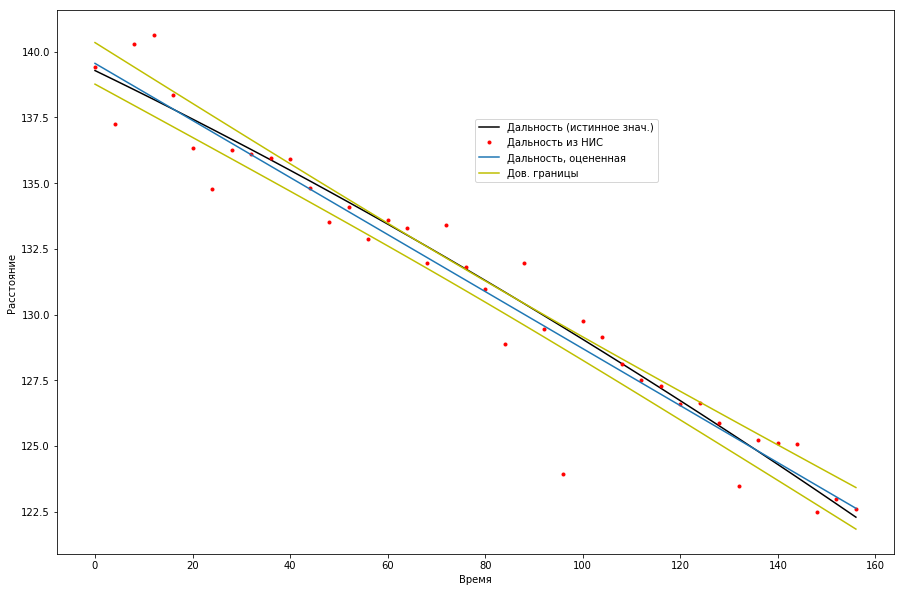

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(t, dalnost, label = 'Дальность (истинное знач.)', color = 'black')
plt.plot(t, IZM_R, '.', label = 'Дальность из НИС', color = 'r')
plt.plot(t, dalnost_approx, label = 'Дальность, оцененная')
plt.plot(t, dover_min, 'y', label = 'Дов. границы')
plt.plot(t, dover_max, 'y')
plt.ylabel('Расстояние')
plt.xlabel('Время')
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)

plt.show()

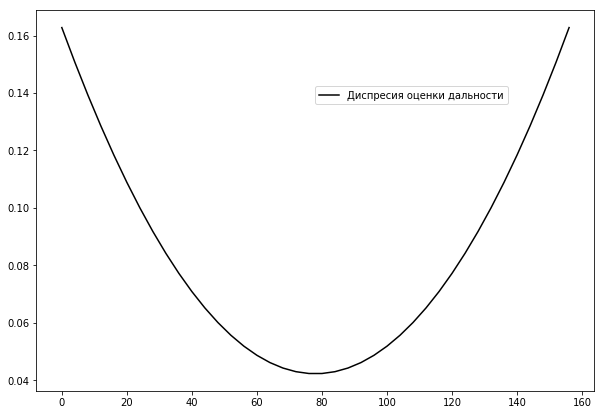

In [24]:
plt.figure(figsize=(10, 7))
plt.plot(t, Disp, label = 'Диспресия оценки дальности', color = 'black')
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)
plt.show()

# Задание 3.

Решим задачу поиска параметров матричным способом

In [25]:
Matrix2 = np.array([[n, sum(t), sum(t**2)], \
             [sum(t), sum(t**2), sum(t**3)], \
             [sum(t**2), sum(t**3), sum (t**4)]])
Vector2 = np.array([sum(IZM_R), sum(IZM_R * t), sum(IZM_R * t**2)])
Tetta_1, Tetta_2, Tetta_3 = np.linalg.solve(Matrix2, Vector2)
print('Значения коэффициентов тета', Tetta_1, Tetta_2, Tetta_3)
dalnost_approx_1 = Tetta_1 + Tetta_2 * t + Tetta_3 * t**2 / 2

Значения коэффициентов тета 139.5723277366967 -0.10911296312135778 3.861792017313645e-06


Аналогично заданию 2 построим графические данные для задания 3

Границы промежутка:

Дисперсия МНК-оценки, выборочная дисперсия

In [26]:
Aa = np.matrix([np.ones(n),t, t**2/2]).transpose() #. матрица А как у влада и ани в отчете про мнк
I = np.eye(n) # единичная матрица
sigma = np.var(W_k)

# тут считает вектор дисперсии для доверительного интервала
def dispersion_count(t_arr):
    Disp = []
    for i in t:
        h_t = np.matrix([1, i, i**2/2]).transpose()
        a = h_t.transpose().dot(inv(Aa.transpose().dot(Aa))).dot(Aa.transpose())
        d_temp = a.dot(sigma).dot(I).dot(a.transpose())
        Disp.append(d_temp.item(0))
    Disp = np.array(Disp)
    return Disp

Disp_1 = dispersion_count(t)

Графики истинной, измеренной, оцененной дальности, доверительного интервала

In [27]:
dover_min_1 = dalnost_approx_1 - ur_znach * Disp_1**0.5
dover_max_1 = dalnost_approx_1 + ur_znach * Disp_1**0.5

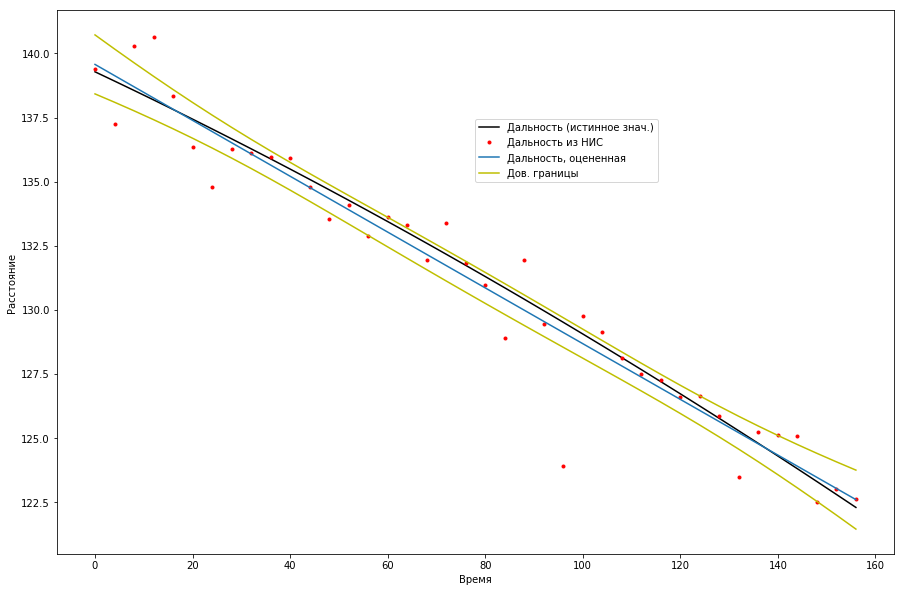

In [28]:
plt.figure(figsize=(15, 10))
plt.plot(t, dalnost, label = 'Дальность (истинное знач.)', color = 'black')
plt.plot(t, IZM_R, '.', label = 'Дальность из НИС', color = 'r')
plt.plot(t, dalnost_approx_1, label = 'Дальность, оцененная')
plt.plot(t, dover_min_1, 'y', label = 'Дов. границы')
plt.plot(t, dover_max_1, 'y')
plt.ylabel('Расстояние')
plt.xlabel('Время')
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)

plt.show()

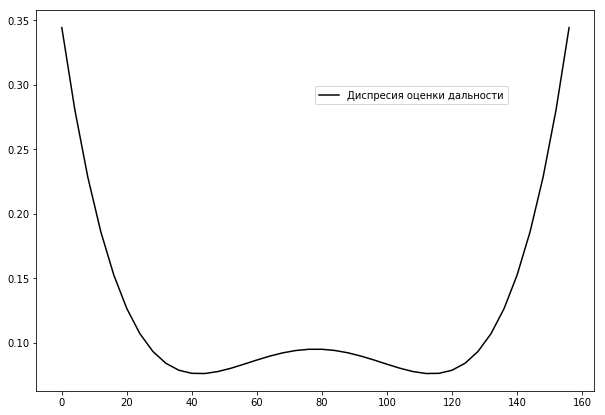

In [29]:
plt.figure(figsize=(10, 7))
plt.plot(t, Disp_1, label = 'Диспресия оценки дальности', color = 'black')
plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)
plt.show()

# Задание 4

На уровне значимости $\alpha$ проверить гипотезу $H_{0} : \{\theta_{3}=0\}$

-2.1491858710819134


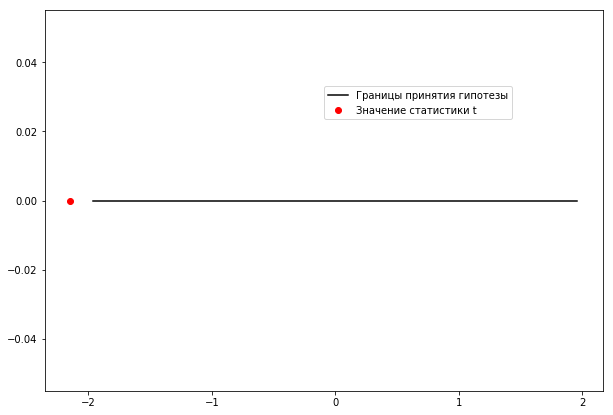

In [46]:
H3def = inv(Aa.transpose().dot(Aa))
Ktheta = 1 * H3def
Dispers = Ktheta[2, 2]
T_ = - Tetta_3 / Dispers**0.76
print(T_)
Ul = -1.95996 # границы доверительного интервала
Ur = - Ul # границы доверительного интервала


plt.figure(figsize=(10, 7))
plt.plot([Ul, Ur], [0,0], label = 'Границы принятия гипотезы', color='black')
plt.plot(T_, 0, 'o', color='red',label = 'Значение статистики t' )

plt.legend(bbox_to_anchor=(0.5, 0.8), loc='upper left', borderaxespad=0.)

plt.show()

# Задание 5

Выбрана модель простой линейной регрессии. Построим для нее гистограмму вектора остатков

Остатки:

In [47]:
Residual = dalnost_approx_1 - IZM_R
# r_ - оцененная дальность с помощью МНК (зеленая прямая)
#Yk_1 - измеренная дальность (оранжевые точки)
# print(residual)

In [48]:
# скопировала в rr наши остатки, чтобы их не изменить случайно
rr = deepcopy(Residual) 
# сортирую по возрастанию
rr = sorted(rr)
left = min(rr)
right = max(rr)
def lapl(x, sigma): 
    return 1/(sko * 2**0.5) * np.exp(-abs(x) * 2**0.5 / sigma)

/Users/synthtron/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


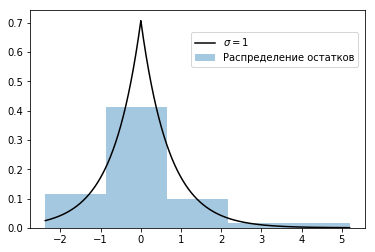

In [49]:
sns_plot = sns.distplot(Residual, bins=bins_1, kde=False, norm_hist=True, label = 'Распределение остатков')
fig = sns_plot.get_figure()

xs = np.arange(left, right, 0.001) # Сетка значений по оси абсцисс.
p2, = plt.plot(xs, [lapl(x, 1) for x in xs], label='$\sigma = 1$', color = 'black')
plt.legend(bbox_to_anchor=(0.48, 0.9), loc='upper left', borderaxespad=0.)
plt.show()


# Задание 6

На уровне значимости $\alpha = 0.05$ по критерию хи-квадрат проверить гипотезу о том, что ошибки подчиняются нормальному распределению $N(0,\sigma)$

Если $\chi^{2}_{1} <= \chi^{2} <= \chi^{2}_{2}$, то гипотеза выполняется

# Переписать теорию как у Влада. Написать свои значения критерия. Для остатков по нормальному распределению напишу ниже:
(эти вычисления я кидала в таблице)

In [167]:
t_nabl = 3.673325177
t_cr = 7.81473

t_nabl < t_cr => гипотеза принимается

Значение статистики: 0.17526997238074038 , Значение уровня значимости: 0.15179479261048767
0.17526997238074038 > 0.15179479261048767
Гипотеза H0 отклоняется


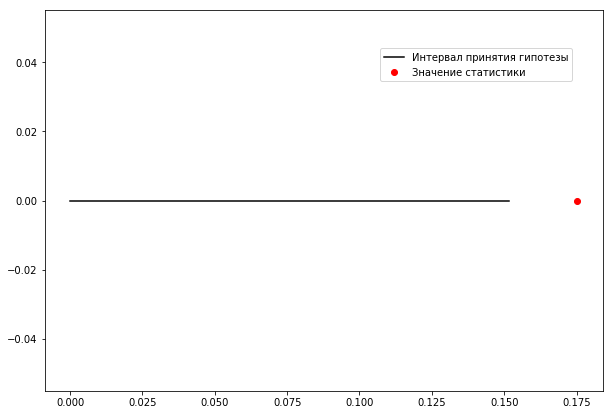

In [54]:
import scipy as scp
from scipy.stats import chisquare
import scipy.stats as stats
D_n = 0.895

data = Residual #np.random.normal(mo, sko, n)
normed_data = (data - mo) / sko
Result = stats.kstest(normed_data,'norm')
print('Значение статистики:', Result.statistic, ',', 'Значение уровня значимости:', Result.pvalue)
if Result.statistic < Result.pvalue:
    print(Result.statistic, '<', Result.pvalue)
    print('Гипотеза H0 принимается')
else:
    print(Result.statistic, '>', Result.pvalue)
    print('Гипотеза H0 отклоняется')
    
plt.figure(figsize=(10, 7))
plt.plot([0, Result.pvalue], [0,0], label = 'Интервал принятия гипотезы', color='black')
plt.plot(Result.statistic, 0, 'o', color='red', label = 'Значение статистики')
plt.legend(bbox_to_anchor=(0.6, 0.9), loc='upper left', borderaxespad=0.)
plt.show()